![](https://img.shields.io/badge/PO.DAAC-Contribution-%20?color=grey&labelColor=blue)

> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/datasets/SWOT_quality_flag_demo.ipynb).

# SWOT Quality Flag Demonstration

### Summary:
SWOT standard data products such as L2_LR_SSH include quality flags that communicate detailed information about the quality of the observation reported. SWOT quality flags are paired one-to-one with the core science data variables in each netcdf file. They're identified by the `qual` suffix, e.g.

- Science data variable: `<variable name>`
    
- Quality flag variable: `<variable name>_qual`
    
Depending on the data product though, the quality flag may not end with `qual`, you may need to alter the code for your particular dataset. See the summary chart below.

Quality flags have different syntax depending on which data product is being used. If a measurement has a quality flag, it can also have a bit flag that provides the detail of why the quality flags are set as they are (see [Product Description Documents](https://podaac.jpl.nasa.gov/SWOT?tab=datasets-information) (PDDs) for specific value meanings). In addition to the ‘_qual’ or ‘_q’ indications, ‘_flag’ or ‘_f’ (e.g., ‘ice_flag’) may be used in each data product to raise different flags with unique values and meanings. See specific PDDs for more information.

| SWOT Product                                                                     | Quality Flag Identifier                                                                  | Values and Meanings                                                                                                                                                                                                              |
|--------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| L2_HR_RiverSP <br />L2_HR_RiverAvg                                                      | Var + ‘_q’ <br /><br />Overall Quality Variables:  <br />‘reach_q’ or ‘node_q’ <br /><br />Bitwise: <br />Var + ‘_q_b’ | 0 = good  <br />1 = suspect - may have large errors <br />2 = degraded - likely to have large errors <br />3 = bad - may be nonsensical and should be ignored <br /><br />*For discharge parameters: (e.g., ‘dschg_c_q’)* <br />0 = valid <br />1 = questionable <br />2 = invalid |
| L2_HR_LakeSP <br />L2_HR_LakeAvg                                                        | Overall quality Variable: ‘quality_f’                                              | 0 = good <br />1 = bad                                                                                                                                                                                                                 |
| L2_HR_Raster                                                                      | Var + ‘_qual’ <br /><br />Ex: ‘wse_qual’ <br /><br />Bitwise:  <br />Var + ‘_qual_bitwise’                       | 0 = good  <br />1 = suspect - may have large errors <br />2 = degraded - likely to have large errors <br />3 = bad - may be nonsensical and should be ignored                                                                                      |
| L2_NALT_GDR <br />L2_NALT_IGDR <br />L2_NALT_OGDR <br />L2_RAD_GDR <br />L2_RAD_IGDR <br />L2_RAD_OGDR <br />L2_FPDEM | Var + ‘_qual’ <br />Ex: ‘rad_water_vapor_qual’                                           | 0 = good <br />1 = bad                                                                                                                                                                                                                 |
| L2_LR_SSH <br />L2_HR_PIXC <br />L1B_HR_SLC <br />L1B_LR_INTF                                       | Var + ‘_qual’                                                                      | Varies, see PDDs                                                                                                                                                                                                                 |

Quality flags are stored as arrays of integers. Each integer decomposes into a series of bits that individually describe data quality according to various criteria specific to each science data product from SWOT. This example will demonstrate how to interrogate the quality information about the ssha_karin_2 variable in one L2 LR SSH product/file.

### Requirement:
This tutorial can be run on a local machine or the AWS cloud, if **AWS cloud, it must be an instance running in us-west-2**: NASA Earthdata Cloud data in https or S3 can be directly accessed via `earthaccess` python library.

### Learning Objectives:
- Demonstrate how to interrogate the quality information for the ssha_karin_2 variable in one L2 LR SSH product/files, though this process can be used for other SWOT data with associated 8-bit quality flags.
- Filter data via quality flags and visualize

_Notebook Author: Jack McNelis, NASA PO.DAAC (April 2024) || Other Contributors: Cassie Nickles (NASA PO.DAAC)_  

### Libraries Needed:

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import earthaccess
import matplotlib.pyplot as plt

### Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up. We use earthaccess to authenticate your login credentials below.

In [2]:
auth = earthaccess.login()

## Use earthaccess to search SWOT data 

Here we use the SSH shortname, `SWOT_L2_LR_SSH_Expert_2.0` 

In [3]:
ssh_results = earthaccess.search_data(short_name = 'SWOT_L2_LR_SSH_Expert_2.0', 
                                      temporal = ("2024-03-22 00:00:00", "2024-03-22 23:59:59"))#,
                                     #granule_name = '*_Expert_012_455*') #if you know what cycle and pass you want, you can be more specific

Granules found: 29


#### If accessing via Local Machine

In [4]:
# If you are on a local machine, download the first file to your local computer
earthaccess.download(ssh_results[0], "./data_downloads/SWOT_files")

 Getting 1 granules, approx download size: 0.03 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

['data_downloads\\SWOT_files\\SWOT_L2_LR_SSH_Expert_012_428_20240321T235733_20240322T004901_PIC0_01.nc']

In [5]:
# Open via xarray
ds = xr.open_mfdataset("./data_downloads/SWOT_files/SWOT_L2_LR_SSH_Expert*.nc")#, mask_and_scale=False)
ds

<xarray.Dataset>
Dimensions:                                (num_lines: 9866, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    longitude                              (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    latitude_nadir                         (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    longitude_nadir                        (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/98)
    time                                   (num_lines) datetime64[ns] dask.array<chunksize=(9866,), meta=np.ndarray>
    time_tai                               (num_lines) datetime64[ns] dask.array<chunksize=(9866,), meta=np.ndarray>
    ssh_karin                              (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssh_karin_qual                         (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssh_karin_uncert                       (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssha_karin                             (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ...                                     ...
    swh_ssb_cor_source                     (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    swh_ssb_cor_source_2                   (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    wind_speed_ssb_cor_source              (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    wind_speed_ssb_cor_source_2            (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    volumetric_correlation                 (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    volumetric_correlation_uncert          (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    institution:                                   CNES
    source:                                        Ka-band radar interferometer
    history:                                       2024-03-24T22:39:40Z : Cre...
    platform:                                      SWOT
    ...                                            ...
    ellipsoid_semi_major_axis:                     6378137.0
    ellipsoid_flattening:                          0.0033528106647474805
    good_ocean_data_percent:                       67.62656103685167
    ssha_variance:                                 0.7787372594877449
    references:                                    V1.2.1
    equator_longitude:                             52.58

#### If accessing via AWS Cloud

In [ ]:
#If you are on the cloud, skip the download step above and access the file via xarray directly
ds = xr.open_mfdataset(earthaccess.open([ssh_results[0]]))#, mask_and_scale=False)
ds

### List all L2 LR SSH quality flag variables in a new python dictionary:

In [6]:
quality_variables = {}

for name, variable in ds.variables.items():
    if name.endswith("qual"):
        quality_variables[name] = None

sorted(list(quality_variables))

['height_cor_xover_qual',
 'orbit_qual',
 'sig0_karin_2_qual',
 'sig0_karin_qual',
 'ssh_karin_2_qual',
 'ssh_karin_qual',
 'ssha_karin_2_qual',
 'ssha_karin_qual',
 'swh_karin_qual',
 'wind_speed_karin_2_qual',
 'wind_speed_karin_qual']

Depending on the data product, the quality flag may not end with `qual`, you may need to alter the above code for your particular dataset. See the summary chart in the introduction.


#### For this example, we will use the `ssha_karin_2` variable from the `L2_LR_SSH` dataset.

In [7]:
variable_name = "ssha_karin_2"

quality_variable_name = f"{variable_name}_qual"

print(variable_name, quality_variable_name)

ssha_karin_2 ssha_karin_2_qual


**Select the `ssha_karin_2_qual` variable and print its header information:**

In [8]:
qual = ds.variables[quality_variable_name].copy() 

print(qual)

<xarray.Variable (num_lines: 9866, num_pixels: 69)>
dask.array<copy, shape=(9866, 69), dtype=float64, chunksize=(9866, 69), chunktype=numpy.ndarray>
Attributes:
    long_name:      sea surface height anomaly quality flag
    standard_name:  status_flag
    flag_meanings:  suspect_large_ssh_delta suspect_large_ssh_std suspect_lar...
    flag_masks:     [         1          2          4          8         16  ...
    valid_min:      0
    valid_max:      3876569055
    comment:        Quality flag for the SSHA from KaRIn in the ssha_karin_2 ...


The `flag_meanings` and `flag_masks` attributes define the quality fields/values assigned to each bit (and/or sequence of bits) comprising the integers in the quality variable array. (Refer to the CF Conventions documentation and SWOT PDDs for additional info about standard attributes stored in each netcdf file from SWOT.) The flag meanings/masks attributes are typically space-delimited strings.

#### Make a simple lookup table for the ssha_karin_2_qual variable:

In [9]:
atts = dict(qual.attrs.copy())

flags = pd.DataFrame({'flag_meanings': atts.get("flag_meanings").split(" "), 
                      'flag_masks': atts.get("flag_masks"), }) \
          .set_index("flag_meanings")

display(flags)

,flag_masks
flag_meanings,
suspect_large_ssh_delta,1
suspect_large_ssh_std,2
suspect_large_ssh_window_std,4
suspect_beam_used,8
suspect_less_than_nine_beams,16
suspect_ssb_out_of_range,64
suspect_pixel_used,128
suspect_num_pt_avg,256
suspect_karin_telem,512


Now print the list of unique integer values in the `ssha_karin_2_qual` variable array. Each value is a sum of an assortment of the numbers above we made in our lookup table. We will decode the quality bits for each one in a new column of our lookup table.

In [11]:
unq_ints_qual = sorted(list(set(qual.load().data.astype(np.int64).flatten().tolist())))

print(f"\n# Counted {len(unq_ints_qual)} unique integers in '{quality_variable_name}' variable array:\n\n{unq_ints_qual}\n")


# Counted 385 unique integers in 'ssha_karin_2_qual' variable array:

[0, 1, 4, 5, 128, 129, 130, 132, 133, 134, 135, 144, 145, 146, 148, 149, 150, 256, 257, 258, 261, 384, 385, 386, 388, 389, 390, 391, 400, 401, 402, 404, 405, 406, 407, 2184, 2185, 2186, 2188, 2189, 2190, 2191, 2200, 2201, 2204, 2205, 2206, 2207, 2440, 2441, 2442, 2444, 2445, 2446, 2447, 2456, 2457, 2458, 2460, 2461, 2462, 2463, 8328, 8329, 8332, 8333, 8344, 8345, 8346, 8348, 8349, 8350, 8584, 8585, 8586, 8588, 8589, 8590, 8591, 8600, 8601, 8602, 8604, 8605, 8606, 8607, 10376, 10380, 10381, 10392, 10393, 10396, 10397, 10398, 10632, 10633, 10634, 10636, 10637, 10638, 10639, 10648, 10649, 10650, 10652, 10653, 10654, 10655, 1073774592, 1073774593, 1073774594, 1073774596, 1073774597, 1073774608, 1073774609, 1073774613, 1073774720, 1073774721, 1073774724, 1073774725, 1073774736, 1073774737, 1073774741, 1073774848, 1073774849, 1073774850, 1073774852, 1073774853, 1073774854, 1073774855, 1073774864, 1073774865, 1073774866, 1

#### Create a bitwise True/False mapping for each unique integer in the ssha_karin_2_qual array.

It's often advantageous to construct a data mask based on the pixels/cells that you'd like to include in your analysis (rather than exclude from it; masking in vs. masking out).

In [12]:
def qual_bits_iter(n):
    while n:
        b = n & (~n+1)
        yield b
        n ^= b

decomposed_qual = {}
for i in sorted(unq_ints_qual):
    if i not in decomposed_qual:
        decomposed_qual[i] = qual_bits_iter(i)

type(decomposed_qual), len(decomposed_qual)

(dict, 385)

Add one new column for each unique integer in the `ssha_karin_qual` variable. Highlight table cells that contain `True`, which indicates the quality criteria on the left/index applies to the pixels/cells in `ssha_karin` wherever the `ssha_karin_qual` array contains one of the corresponding integers.

In [13]:
new_columns_qual = {}
for i, j in enumerate(list(set(decomposed_qual))):
    new_columns_qual[j] = flags['flag_masks'] \
        .apply(lambda x: x in [b for b in qual_bits_iter(j)])

lookup = flags.join(pd.DataFrame(new_columns_qual).sort_index(axis=1)).copy()

display(lookup.style.apply(lambda x: ['background-color:yellow' if all([i,type(i)==bool]) else '' for i in x]))

Note the distribution of the highlighted cells in the table above. (And see my earlier point about integer size and the number significant bits.)

#### Finally, create a mask based on some criteria selected from the table above.

For a simple example, let's create a mask that excludes pixels that have quality flags prefixed with "bad" or "degraded", which includes all the flag meanings in this list:

In [14]:
flags_to_mask = sorted([i for i in lookup.index if i.startswith(('bad', 'degraded', 'suspect', ))])

display(flags_to_mask)

['bad_karin_telem',
 'bad_not_usable',
 'bad_outside_of_range',
 'bad_tide_corrections_missing',
 'bad_very_large_attitude',
 'degraded',
 'degraded_beam_used',
 'degraded_karin_ifft_overflow',
 'degraded_large_attitude',
 'degraded_media_delays_missing',
 'degraded_ssb_not_computable',
 'suspect_beam_used',
 'suspect_karin_telem',
 'suspect_large_ssh_delta',
 'suspect_large_ssh_std',
 'suspect_large_ssh_window_std',
 'suspect_less_than_nine_beams',
 'suspect_num_pt_avg',
 'suspect_orbit_control',
 'suspect_pixel_used',
 'suspect_sc_event_flag',
 'suspect_ssb_out_of_range',
 'suspect_tvp_qual',
 'suspect_volumetric_corr']

##### Now select the columns that contain True in any of the rows indexed by the list of flags_to_mask:

In [15]:
tmp = lookup.copy()  # Make a copy of the table.

del tmp['flag_masks']  # Remove the 'flag_masks' column.

indices = tmp.loc[flags_to_mask].apply(lambda x: x.any()).copy()  # Get a boolean array of integers that comprise the mask.

integers = sorted(tmp.columns[indices].astype(np.int64).tolist())  # Get the columns/integers with one or more flag set to True.

print(len(integers))

384


##### Now get the 2d boolean index where `ssha_karin_2_qual` array contains any of the integers in the list.

In [16]:
ssha_karin_2_mask = np.isin(qual.load().data, integers)

print(f"Masked: {ssha_karin_2_mask.sum()} / {ssha_karin_2_mask.size}\n")

display(ssha_karin_2_mask)

Masked: 428494 / 680754



array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

##### Convert the boolean mask array to the equivalent 0,1 integer array and add it to the xarray Dataset as a new variable:

In [23]:
out = ds.copy()

out['mask'] = out[variable_name].copy()
out['mask'].data = np.where(out.ancillary_surface_classification_flag==0, ssha_karin_2_mask.astype(np.int64), 0)
out['mask'].attrs = {}

#correct for cross over calibration for the ssha variable so it plots correctly
out['ssha_karin_2_corrected'] = out.ssha_karin_2 + out.height_cor_xover

### Plot

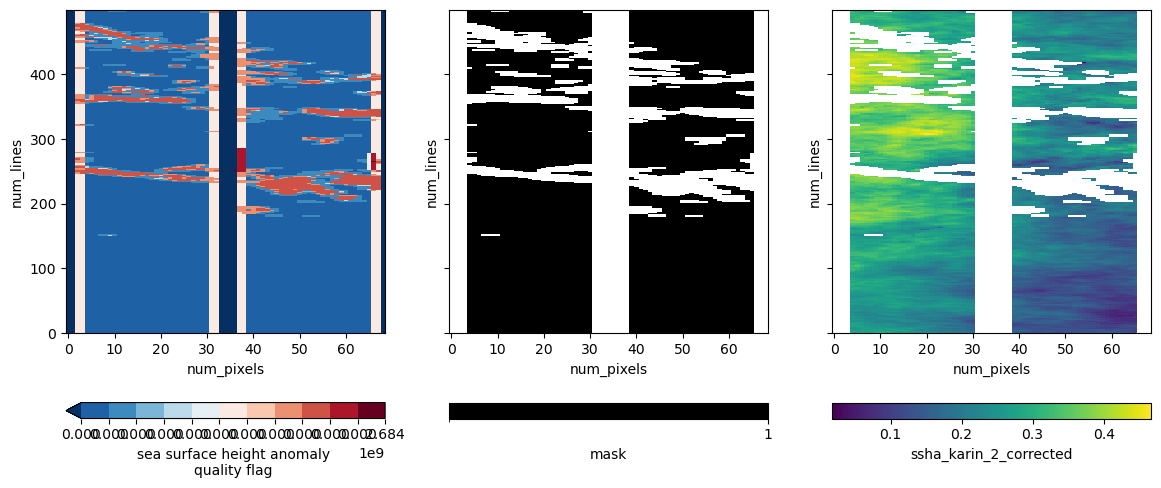

In [26]:
#Plot
SLICE = slice(5000, 5500)

fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharey=True) #sharex=True, 

LVLS = sorted(set(list(qual.load().isel(num_lines=SLICE).data.flatten())))

out.ssha_karin_2_qual.isel(num_lines=SLICE).astype(int) \
    .plot(ax=axes[0], levels=LVLS, add_colorbar=True, cbar_kwargs={'orientation': 'horizontal', 'spacing': 'uniform', 'ticks': LVLS})

out.mask.isel(num_lines=SLICE) \
    .plot(ax=axes[1], colors=['black'], add_colorbar=True, cbar_kwargs={'orientation': 'horizontal', 'ticks': [1], }, levels=[0, 1] )

ssha_karin_2_masked = out.ssha_karin_2_corrected \
    .where(out.mask==0, np.nan).copy()

ssha_karin_2_masked.isel(num_lines=SLICE) \
    .plot(ax=axes[2], add_colorbar=True, cbar_kwargs={'orientation': 'horizontal'}, )

We've applied the quality mask to the `ssha_karin_2` variable and visualized the result!